In [23]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

1. Data Load
>  - Check the data list of the headgear

In [24]:
data_dir = '/NasData/home/knh/review/data'
headgear_dir = os.path.join(data_dir, 'headgear')
print(os.listdir(headgear_dir))

['train', 'valid', 'headgear.csv', 'test', 'headgear-20-(224 X 224)- 98.99.h5']


In [25]:
headgear_csv = os.path.join(headgear_dir, 'headgear.csv')
print(headgear_csv)

/NasData/home/knh/review/data/headgear/headgear.csv


>  - Load the data from the csv file

In [26]:
headgear_df = pd.read_csv(headgear_csv)

2. Data Analysis
>  - Check the data

In [27]:
print(headgear_df)

      class id                filepaths     labels data set
0            0  train/ASCOT CAP/001.jpg  ASCOT CAP    train
1            0  train/ASCOT CAP/002.jpg  ASCOT CAP    train
2            0  train/ASCOT CAP/003.jpg  ASCOT CAP    train
3            0  train/ASCOT CAP/004.jpg  ASCOT CAP    train
4            0  train/ASCOT CAP/005.jpg  ASCOT CAP    train
...        ...                      ...        ...      ...
3815        19    valid/ZUCCHETTO/1.jpg  ZUCCHETTO    valid
3816        19    valid/ZUCCHETTO/2.jpg  ZUCCHETTO    valid
3817        19    valid/ZUCCHETTO/3.jpg  ZUCCHETTO    valid
3818        19    valid/ZUCCHETTO/4.jpg  ZUCCHETTO    valid
3819        19    valid/ZUCCHETTO/5.jpg  ZUCCHETTO    valid

[3820 rows x 4 columns]


>  - Plot the data distribution

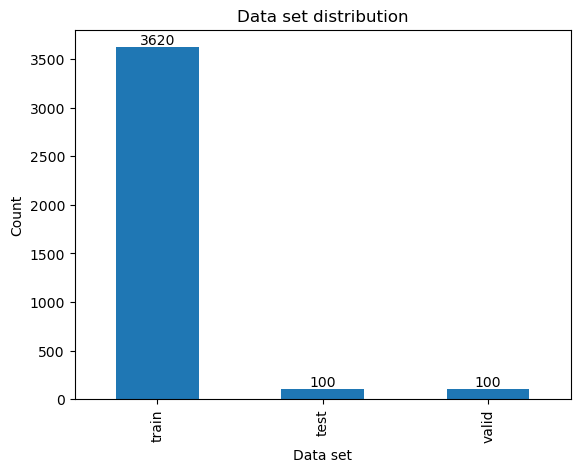

In [28]:
headgear_df['data set'].value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('Data set')
plt.ylabel('Count')

for i in range(len(headgear_df['data set'].value_counts())):
    plt.text(i, headgear_df['data set'].value_counts()[i], headgear_df['data set'].value_counts()[i], ha='center', va='bottom')
    
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PITH HELMET'),
  Text(1, 0, 'PORK PIE'),
  Text(2, 0, 'MILITARY HELMET'),
  Text(3, 0, 'FOOTBALL HELMET'),
  Text(4, 0, 'GARRISON CAP'),
  Text(5, 0, 'SOMBERO'),
  Text(6, 0, 'BICORNE'),
  Text(7, 0, 'BASEBALL CAP'),
  Text(8, 0, 'HARD HAT'),
  Text(9, 0, 'FEZ'),
  Text(10, 0, 'BOATER'),
  Text(11, 0, 'TOP HAT'),
  Text(12, 0, 'DEERSTALKER'),
  Text(13, 0, 'ASCOT CAP'),
  Text(14, 0, 'MOTARBOARD'),
  Text(15, 0, 'BOWLER'),
  Text(16, 0, 'FEDORA'),
  Text(17, 0, 'BERET'),
  Text(18, 0, 'ZUCCHETTO'),
  Text(19, 0, 'SOUTHWESTER')])

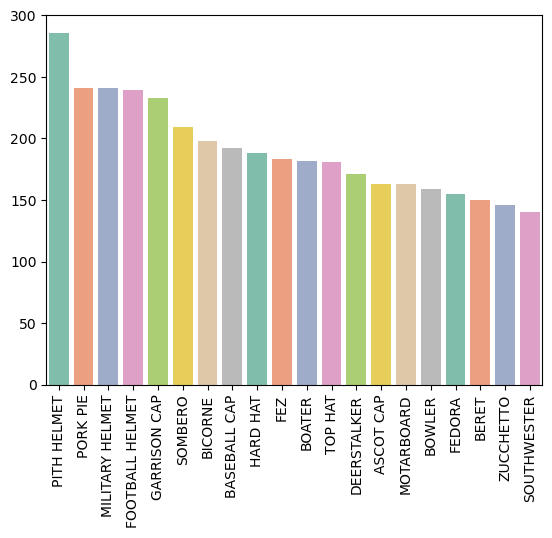

In [29]:
import seaborn as sns
data_dist = headgear_df['labels'].value_counts()
sns.barplot(x=data_dist.index, y=data_dist.values, alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

In [30]:
headgear_df['data set'].value_counts()

train    3620
test      100
valid     100
Name: data set, dtype: int64

In [31]:
headgear_dir

'/NasData/home/knh/review/data/headgear'

Plot the data sample

In [32]:
image_path = os.path.join(headgear_dir, headgear_df['filepaths'][0])
print(image_path)

/NasData/home/knh/review/data/headgear/train/ASCOT CAP/001.jpg


Image Size:  (224, 224, 3)


Text(0.5, 1.0, 'Image')

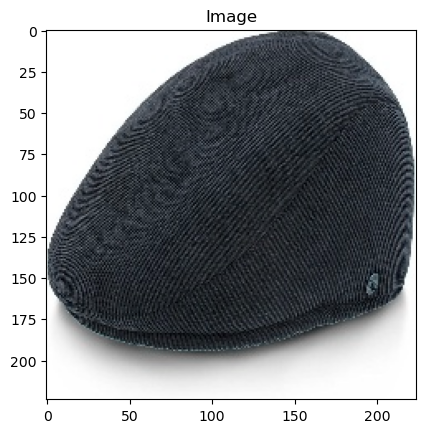

In [33]:
image = cv2.imread(image_path)
print('Image Size: ', image.shape)

plt.imshow(image)
plt.title('Image')

Plot the data sample with Transformed Image

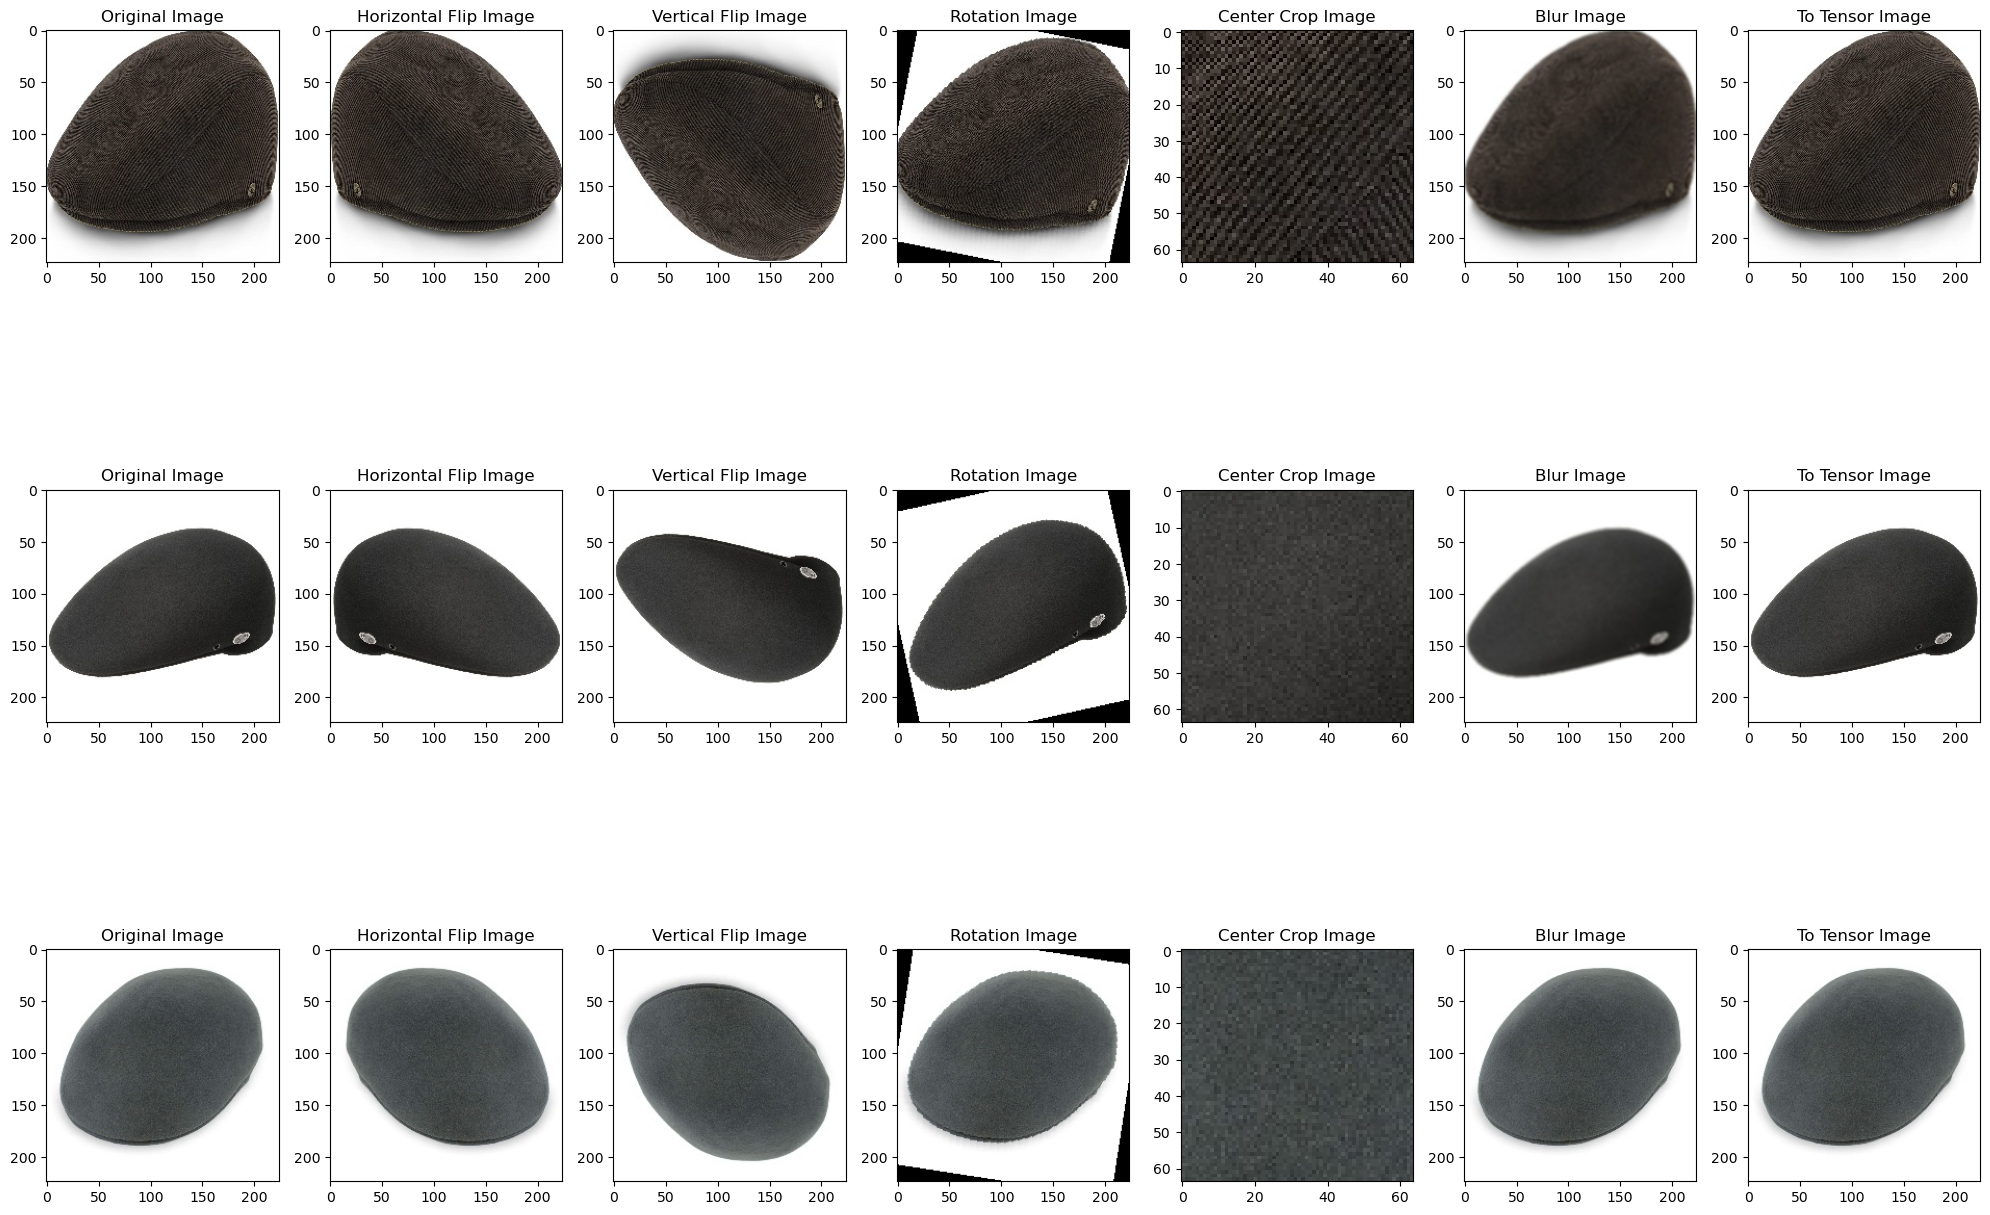

In [34]:
from torchvision import transforms
from PIL import Image
import torch

transformations = {
    "Original": None,
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1),  # p=1 (probability = 1) to always apply the flip
    "Vertical Flip": transforms.RandomVerticalFlip(p=1),
    "Rotation": transforms.RandomRotation(30),
    "Center Crop": transforms.CenterCrop(64),
    "Blur": transforms.GaussianBlur(5),  # you can blur kernel size = {3, 5, 7} and check the image
    "To Tensor": transforms.ToTensor(),
}

sample_images = [headgear_df['filepaths'][i] for i in range(3)] # Select 3 sample images

fig, axs = plt.subplots(len(sample_images), len(transformations), figsize=(20, 15))

for i, filepath in enumerate(sample_images):
    image_path = os.path.join(headgear_dir, filepath)
    image = Image.open(image_path).convert('RGB')

    for j, (transformation_name, transformation) in enumerate(transformations.items()):
        if transformation:
            transformed_image = transformation(image)
            if transformation_name == 'To Tensor':
                image = transformed_image
        else:
            transformed_image = image

        if isinstance(transformed_image, torch.Tensor):
            # Convert tensor to numpy array for visualization
            transformed_image = transformed_image.permute(1, 2, 0).numpy()

        axs[i, j].imshow(transformed_image)
        axs[i, j].set_title(f"{transformation_name} Image")

plt.tight_layout()
plt.show()

3. Split the data
>  - This dataset is already split into train and test set. So, we don't need to split the data.

In [35]:
train_data_df = headgear_df[headgear_df['data set'] == 'train']
valid_data_df = headgear_df[headgear_df['data set'] == 'valid']
test_data_df = headgear_df[headgear_df['data set'] == 'test']

>  - Image to Tensor

In [36]:
train_data = []
train_labels = []

for index, row in train_data_df.iterrows():
    image_path = os.path.join(headgear_dir, row['filepaths'])
    image = cv2.imread(image_path)
    train_data.append(image)
    train_labels.append(row['labels'])

In [37]:
print('Train Data: ', len(train_data))
print('Train Labels: ', len(train_labels))
print('Train Data Shape: ', train_data[0].shape)

Train Data:  3620
Train Labels:  3620
Train Data Shape:  (224, 224, 3)
